## Testing Unified model in NeuroML

In [1]:
!cat chModeler_channels.xml

<Lems>

    
    <Include file="UnifiedChannel.xml"/>
    
    <!--
    
    "params = "{
        "v_half = "-0.0180258243417786,
        "slope = "0.02767644720667024,
        "e_rev = "-0.10214357831312094,
        "g = "0.0005145869718619175,
        "ra = "1.2544609703106782,
        "sa = "-47.83800773213494,
        "rb = "40.02690897092817,
        "vb = "0.03709222498027761,
        "sb = "0.012461435698388186,
        "rc = "0.14598906450108934
    },
    
    -->
    
    <UnifiedChannel id="Kcnh1" 
        conductance="0.0005145869718619175 S"
        v_half = "-0.0180258243417786 V"
        slope = "0.02767644720667024 V"
        ra = "1.2544609703106782 per_s"
        sa = "-47.83800773213494 per_V"
        rb = "40.02690897092817 per_s"
        vb = "0.03709222498027761 V"
        sb = "0.012461435698388186 V"
        rc = "0.14598906450108934 per_s">

    </UnifiedChannel> 
        
    
</Lems>

In [3]:
from pyneuroml import pynml

traces = pynml.run_lems_with_jneuroml(
    'LEMS_TestIClamp.xml', max_memory="2G", nogui=True, plot=False, load_saved_data=True
)

print('Reloaded results: %s'%traces.keys())

pyNeuroML >>> Reloading data specified in LEMS file: LEMS_TestIClamp.xml (/Users/padraig/git/chModeler/NeuroML2/LEMS_TestIClamp.xml), base_dir: ., cwd: /Users/padraig/git/chModeler/NeuroML2; plotting True
Reloaded results: dict_keys(['t', 'hhpop[0]/v', 'hhpop[0]/bioPhys1/membraneProperties/kChans/channelg', 'hhpop[0]/bioPhys1/membraneProperties/kChans/Kcnh1/alpha', 'hhpop[0]/bioPhys1/membraneProperties/kChans/Kcnh1/beta', 'hhpop[0]/bioPhys1/membraneProperties/kChans/Kcnh1/c'])


Plotting hhpop[0]/v (v)
Plotting hhpop[0]/bioPhys1/membraneProperties/kChans/channelg (g)
Plotting hhpop[0]/bioPhys1/membraneProperties/kChans/Kcnh1/alpha (alpha)
Plotting hhpop[0]/bioPhys1/membraneProperties/kChans/Kcnh1/beta (beta)
Plotting hhpop[0]/bioPhys1/membraneProperties/kChans/Kcnh1/c (c)


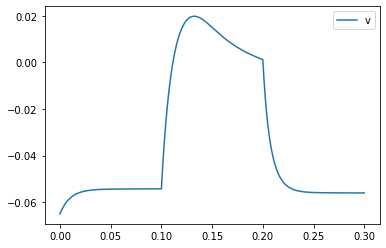

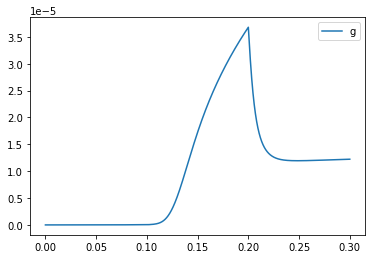

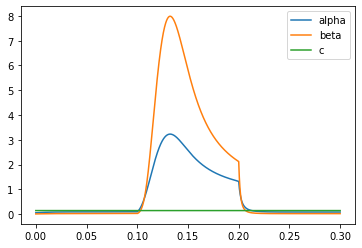

In [14]:
import matplotlib.pyplot as plt
plots = {'Voltage':{'v':'hhpop[0]/v'},
         'conductance':{'g':'hhpop[0]/bioPhys1/membraneProperties/kChans/channelg'},
        'rates':{'alpha':'hhpop[0]/bioPhys1/membraneProperties/kChans/Kcnh1/alpha', 
                 'beta':'hhpop[0]/bioPhys1/membraneProperties/kChans/Kcnh1/beta', 
                 'c':'hhpop[0]/bioPhys1/membraneProperties/kChans/Kcnh1/c'}}

for p in plots:
    plt.figure()
    for v in plots[p]:
        #print('Plotting %s (%s)'%(plots[p][v], v))
        plt.plot(traces['t'], traces[plots[p][v]], label=v)
        plt.legend()
        
plt.show()